In [44]:
import numpy as np
import matplotlib.pyplot as plt
import stats
from iminuit import Minuit
from iminuit.cost import ExtendedUnbinnedNLL,UnbinnedNLL,LeastSquares,BinnedNLL
from IPython.display import Latex
# from scipy.stats import 

In [45]:
def f(x,p_0,p_1):
    x = np.array(x)
    return (np.power((x-p_0),3) + p_1)

In [46]:
def gen_data(x,func,mu=0,sigma=1):
    return np.array([func(i,2,3) + stats.normal(mu,sigma,n=10) for i in x])

<h2>Grafico Dati

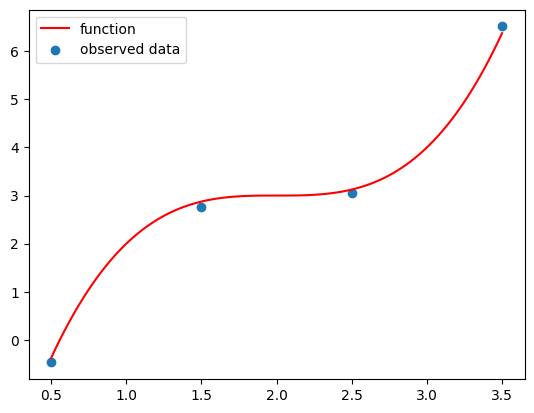

In [47]:
# funzione continua
x = np.linspace(0.5,3.5,100)
y = gen_data(x,f,0,0)
plt.plot(x,y, c = 'r')

# dati
x = [0.5, 1.5, 2.5, 3.5]
y = gen_data(x,f,mu=0,sigma=0.2)
plt.scatter(x,y)

plt.legend(['function','observed data'])
plt.show()

<h2>Fit

In [48]:
def fit(x,y,yerror,p_0,p_1,func):
    cost = LeastSquares(x,y,yerror,func)
    my_minuit = Minuit(cost, p_0=p_0, p_1=p_1)
    my_minuit.migrad()
    my_minuit.hesse()
    return my_minuit

In [49]:
my_minuit = fit(x,y,0.3,2,3,f)
display(my_minuit)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.3028 (χ²/ndof = 0.2)     │              Nfcn = 41               │
│ EDM = 1.26e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ p_0  │   1.98    │   0.05    │            │            │         │         │       │
│ 1 │ p_1  │   2.89    │   0.24    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬─────────────────┐
│     │     p_0     p_1 │
├─────┼─────────────────┤
│ p_0 │ 0.00266  0.0100 │
│ p_1 │  0.0100  0.0599 │
└─────┴─────────────────┘

In [50]:
Latex(f"$$Q^2 = {{{my_minuit.fval}}} \\newline doF = {{{my_minuit.ndof}}}$$")

<IPython.core.display.Latex object>

In [51]:
def fit_likelihood(y,p_0,p_1):

    cost = UnbinnedNLL(y,f)
    my_minuit = Minuit(cost, p_0, p_1)
    my_minuit.migrad()
    my_minuit.hesse()
    # display(my_minuit)
    return my_minuit

#NON FUNGE DIOCANEEEEE
# my_minuit= fit_likelihood(y,2,3)
# display(my_minuit)

In [52]:
def toy(x,N,func):
    q_s = []
    for i in range(N):
        
        y = gen_data(x,func,mu=0,sigma=0.1)
        Q = fit(x,y,0.3,2,3,func).fval
        # p = fit(x,y,0.3,2,3).
        
        q_s.append(Q)
    return q_s

In [53]:
data = toy(x,2000,f)

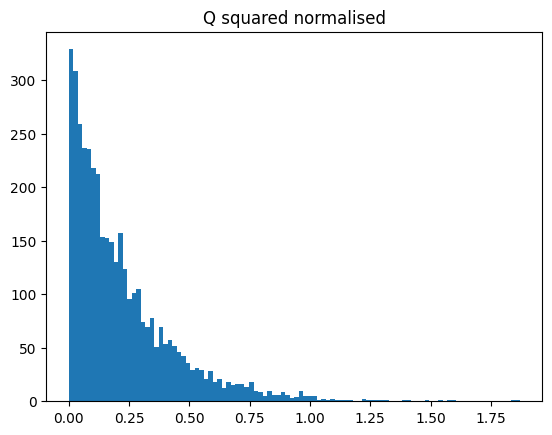

In [95]:
plt.hist(data,bins=100,density=False)
plt.title("Q squared normalised")
plt.show()

<h2> punto5

In [59]:
def g(x,p_0,p_1):
    x = np.array(x)
    return np.power(x-p_0, 2) + p_1

In [66]:
def compare(sigma,N=1000):

    y_f = gen_data(x,f,0,sigma)
    y_g = gen_data(x,g,0,sigma)

    toy_f = toy(x,N,f)
    toy_g = toy(x,N,g)
    
    return toy_f, toy_g

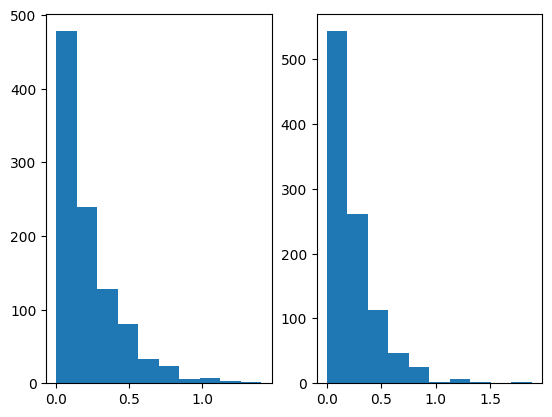

In [67]:
toy_f , toy_g = compare(0.3)

fig,ax = plt.subplots(1,2)
ax[0].hist(toy_f)
ax[1].hist(toy_g)
plt.show()

<h2>Punto 6</h2>
<p4>
Si determini come vari la differenza di risultati fra i due fit all’aumentare della sigma della distribu-
zione Gaussiana utilizzata per generare i valori yi: come si potrebbe quantificare questa differenza?

In [82]:
def diff(x,sigma):
    p0,p1 = list(),list()
    for i in sigma:

        y_f = gen_data(x,f,mu=0,sigma=i)
        y_g = gen_data(x,g,mu=0,sigma=i)

        fit_f = fit(x,y_f,i,2,3,f)
        fit_g = fit(x,y_g,i,2,3,g)
        p0.append(fit_f.values[0]-fit_g.values[0])
        p1.append(fit_f.values[1]-fit_g.values[1])

    return p0,p1

In [98]:
sigma = np.linspace(0.01,5,3000)
scarti_p0,scarti_p1 = diff(x,sigma)

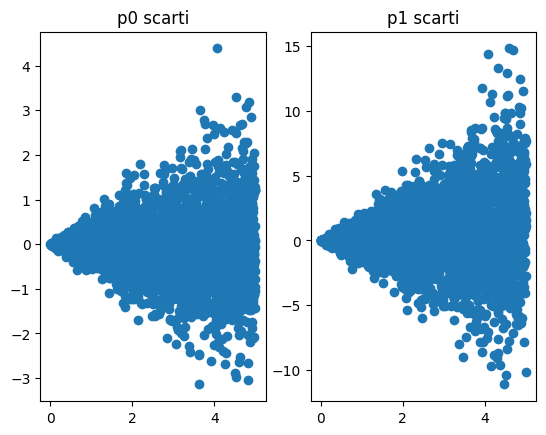

In [99]:
fig,ax = plt.subplots(1,2)

ax[0].scatter(sigma,scarti_p0)
ax[1].scatter(sigma,scarti_p1)
ax[0].set_title("p0 scarti")
ax[1].set_title("p1 scarti")

plt.show()